### Exercise

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [84]:
left = df[df.left==1]       

left.shape

(3571, 10)

In [85]:
stayed = df[df.left==0]
stayed.shape

(11428, 10)

### Creating Bar chart Question 2

In [86]:
sal_left = pd.crosstab(df.salary,df.left)
sal_left

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='Retention', ylabel='Salary'>

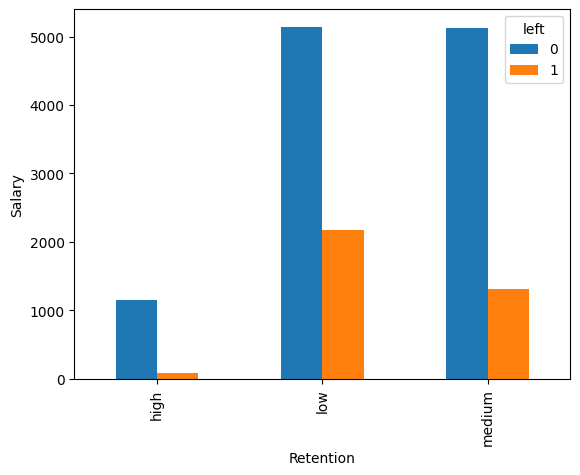

In [87]:
sal_left.plot(kind='bar',ylabel='Salary',xlabel='Retention')

### Creating Bar Chart

In [88]:
left_Dept = pd.crosstab(df.left,df.Department)
left_Dept

Department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,954,666,563,524,539,655,704,3126,1674,2023
1,273,121,204,215,91,203,198,1014,555,697


<Axes: xlabel='Retention', ylabel='Numbers of Employee'>

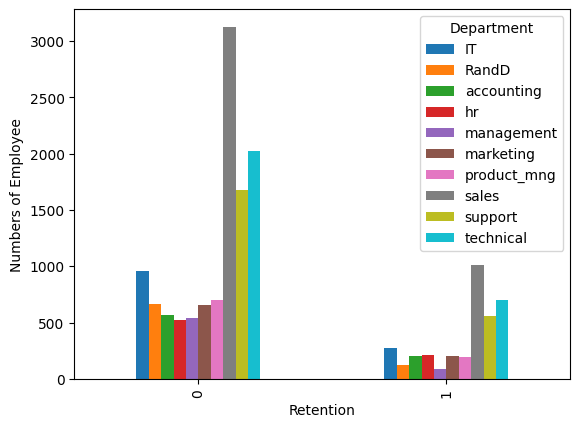

In [89]:
left_Dept.plot(kind='bar',xlabel='Retention',ylabel='Numbers of Employee')

In [90]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [97]:
from sklearn.preprocessing import LabelEncoder          # LabelEncoder = converting text into int
le_salary = LabelEncoder()

In [98]:
df['Salary_n'] = le_salary.fit_transform(df['salary'])

In [102]:
df_n = df.drop('salary',axis='columns')
df_n

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,Salary_n
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_n.drop(['Salary_n','number_project','time_spend_company','Work_accident','left','Department'],axis='columns'),df_n.left,test_size=0.3)

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [107]:
model.fit(x_train,y_train)

LogisticRegression()

In [108]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
model.score(x_test,y_test)

0.7662222222222222